# Introdução ao Método Preditivo KNN (K-Nearest Neighbors)

### Visão Geral do KNN
- O KNN é um algoritmo de aprendizado de máquina supervisionado utilizado para classificação e regressão.
- Ele é considerado um dos algoritmos mais simples e eficazes para resolver problemas de classificação e regressão.

### Princípio Básico
- O KNN opera com base na premissa de que objetos semelhantes tendem a estar próximos uns dos outros em um espaço multidimensional.
- A ideia central é encontrar os "vizinhos mais próximos" de um ponto de dados desconhecido para fazer previsões.

### Parâmetro K
- O "K" em KNN refere-se ao número de vizinhos mais próximos que serão considerados ao fazer uma previsão.
- O valor de K é um hiperparâmetro que precisa ser ajustado de acordo com o problema em questão.
- Valores pequenos de K podem levar a previsões instáveis e sensíveis a outliers, enquanto valores grandes de K podem suavizar demais a decisão.

### Métrica de Distância
- Para determinar a proximidade entre pontos de dados, é necessário escolher uma métrica de distância, como a distância euclidiana, a distância de Manhattan ou outras métricas personalizadas.
- A escolha da métrica de distância depende da natureza dos dados e do problema em questão.

### Processo de Classificação
- No caso da classificação, o KNN calcula a classe mais frequente entre os K vizinhos mais próximos e atribui essa classe ao ponto de dados desconhecido.
- O KNN pode usar votação ponderada, onde vizinhos mais próximos têm maior influência.

### Processo de Regressão
- Na regressão, o KNN calcula a média (ou outra medida estatística) dos valores alvo dos K vizinhos mais próximos e atribui esse valor ao ponto de dados desconhecido.

### Preparação de Dados
- É crucial realizar a normalização ou padronização dos dados antes de aplicar o KNN, já que as métricas de distância são sensíveis à escala dos recursos.

### Desafios e Considerações
- O KNN pode ser computacionalmente caro para grandes conjuntos de dados, uma vez que requer o cálculo de distâncias para todos os pontos de treinamento.
- A seleção adequada de K e da métrica de distância é crítica para o desempenho do algoritmo.
- Lidar com dados desbalanceados e outliers também é um desafio importante.

### Vantagens e Desvantagens
- Vantagens: Simplicidade, eficácia em problemas não lineares, fácil interpretação.
- Desvantagens: Sensibilidade a outliers, requer escolha apropriada de K e métrica de distância, baixo desempenho em conjuntos de dados de alta dimensionalidade.

### Aplicações
- O KNN é utilizado em uma variedade de aplicações, incluindo reconhecimento de padrões, filtragem colaborativa, diagnóstico médico, detecção de fraudes e muito mais.


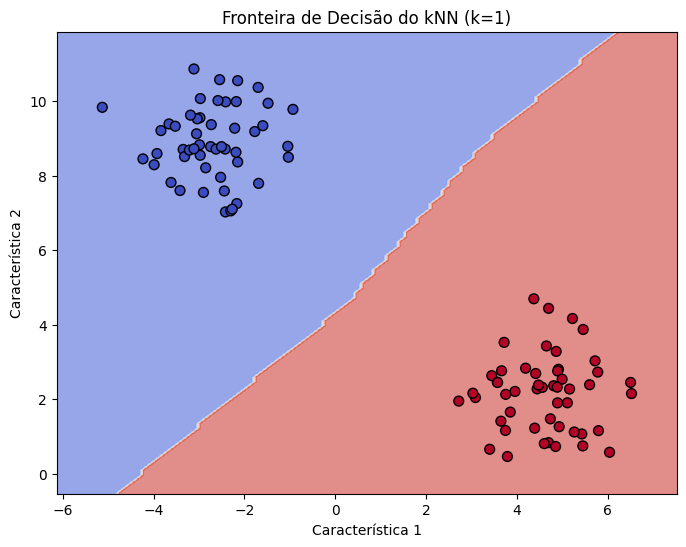

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# Gerar dados sintéticos com duas classes
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Inicializar o modelo kNN com k=1
knn = KNeighborsClassifier(n_neighbors=1)

# Treinar o modelo com todos os dados
knn.fit(X, y)

# Criar uma grade de pontos para a fronteira de decisão
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar os dados e a fronteira de decisão
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', marker='o')
plt.title('Fronteira de Decisão do kNN (k=1)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


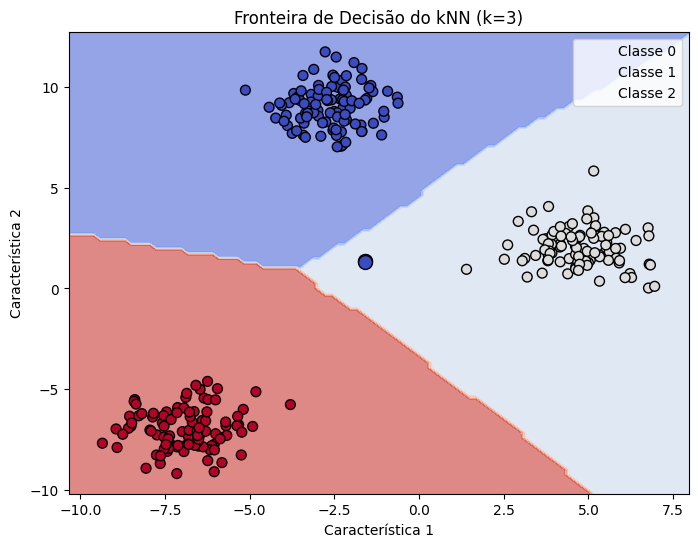

In [2]:
# Gerar dados sintéticos com três classes e maior dispersão
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Inicializar o modelo kNN com k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo com todos os dados
knn.fit(X, y)

# Criar uma grade de pontos para a fronteira de decisão
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar os dados e a fronteira de decisão
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', marker='o')
plt.title('Fronteira de Decisão do kNN (k=3)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Plotar os centróides das classes com bolinhas coloridas
centroids = knn._tree.query(X, k=3)[1]
for i in range(3):
    centroid_x = X[centroids[:, i], 0].mean()
    centroid_y = X[centroids[:, i], 1].mean()
    plt.scatter(centroid_x, centroid_y, c=[i], cmap='coolwarm', s=100, edgecolors='k', marker='o', label=f'Centróide Classe {i + 1}')

# Adicionar legenda
legend_labels = [f'Classe {i}' for i in range(3)]
plt.legend(legend_labels, loc='upper right')

plt.show()


## 1.1 Explicação Teórica


### O que é kNN e por que é chamado de método baseado em distância?

O KNN, ou K-Nearest Neighbors, é um algoritmo de aprendizado de máquina supervisionado amplamente utilizado em tarefas de classificação e regressão. A principal intuição por trás do KNN é que objetos semelhantes tendem a estar próximos uns dos outros em um espaço multidimensional. Ele é chamado de método baseado em distância porque a sua lógica central gira em torno do cálculo das distâncias entre pontos de dados.

### Como o KNN funciona?

O funcionamento do KNN pode ser resumido em dois passos principais:

#### Cálculo de Distâncias

1. **Cálculo de Distâncias**: O primeiro passo envolve o cálculo das distâncias entre o ponto de dados desconhecido (o que você deseja classificar ou prever) e todos os outros pontos de dados no conjunto de treinamento. As distâncias podem ser calculadas utilizando métricas como a distância euclidiana, a distância de Manhattan ou outras métricas personalizadas, dependendo do problema em questão.

#### Votação dos k Vizinhos Mais Próximos

2. **Votação dos k Vizinhos Mais Próximos**: Após calcular as distâncias, o KNN seleciona os k vizinhos mais próximos do ponto de dados desconhecido. O valor de k é um hiperparâmetro que você precisa definir antes de aplicar o algoritmo. O KNN então realiza uma votação para determinar a classe (no caso de classificação) ou o valor médio (no caso de regressão) do ponto de dados desconhecido com base nas classes ou valores dos k vizinhos mais próximos. A classe ou valor mais frequente se torna a previsão final.

Este é o cerne do funcionamento do KNN, onde a similaridade é medida com base na distância entre pontos e a decisão é tomada com base na maioria dos vizinhos mais próximos.

Agora que temos uma compreensão básica do KNN e seu funcionamento, avançaremos para as considerações práticas e implementação deste algoritmo.


# Vantagens e Desvantagens do kNN

## Vantagens:

1. **Simplicidade**: O kNN é um algoritmo simples e fácil de entender. Ele não requer uma suposição explícita sobre a distribuição dos dados e pode ser usado em problemas de classificação e regressão.

2. **Adaptabilidade**: O kNN é um algoritmo não paramétrico, o que significa que ele não faz suposições específicas sobre a forma da função que relaciona as entradas às saídas. Isso o torna adaptável a uma variedade de problemas, incluindo aqueles em que a relação entre os recursos e as saídas não é linear.

3. **Facilidade de interpretação**: As previsões do kNN podem ser facilmente interpretadas. Podemos identificar quais são os vizinhos mais próximos que contribuem para a classificação de um ponto de dados específico, o que pode ser útil para análise de casos específicos.

## Desvantagens:

1. **Custo Computacional Alto para Datasets Grandes**: O kNN precisa calcular a distância entre o ponto de consulta e todos os pontos de dados no conjunto de treinamento para fazer uma previsão. Isso pode ser computacionalmente caro em datasets grandes, especialmente se o número de características for alto.

2. **Sensível a Características Irrelevantes**: O kNN considera todas as características igualmente importantes no cálculo da distância. Se o conjunto de dados contiver características irrelevantes ou ruidosas, elas podem afetar negativamente o desempenho do algoritmo.

3. **Necessidade de Ajuste de Hiperparâmetros**: O valor de 'k' (número de vizinhos) no kNN é um hiperparâmetro que precisa ser ajustado. Escolher um valor adequado para 'k' pode ser um desafio e requer validação cruzada ou outras técnicas de ajuste de hiperparâmetros.

4. **Não Lida Bem com Dados Desbalanceados**: Em conjuntos de dados desbalanceados, onde uma classe tem muitos mais exemplos do que outra, o kNN pode ser enviesado em direção à classe majoritária, resultando em classificações menos precisas para a classe minoritária.

O kNN é uma ferramenta poderosa, especialmente em cenários onde a simplicidade e a adaptabilidade são importantes. No entanto, é fundamental entender suas vantagens e desvantagens para decidir quando é apropriado usá-lo e como ajustar seus parâmetros adequadamente para obter o melhor desempenho.


## 1.2 - Aplicaçao prárica


## Regressão

In [3]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [4]:
# Carregar os dados
df = pd.read_csv('notebooks_regressao.csv')
X = df.drop(columns='valor').values
y = df[['valor']]

In [5]:
# Separar os dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Importância da Normalização de Dados para o k-Nearest Neighbors (kNN)

## Por que Normalizar os Dados

A normalização de dados desempenha um papel crucial ao usar o algoritmo k-Nearest Neighbors (kNN) para classificação ou regressão. Aqui estão algumas razões pelas quais a normalização é importante:

1. **Cálculo de Distâncias**: O kNN depende fortemente do cálculo de distâncias entre pontos de dados no espaço de atributos. Se os dados não estiverem normalizados, características com escalas maiores podem dominar o cálculo de distância, levando a resultados tendenciosos. A normalização garante que todas as características tenham a mesma influência nas distâncias.

2. **Evita Problemas de Escala**: Sem a normalização, características com unidades diferentes (por exemplo, quilogramas e metros) podem criar inconsistências nos resultados do kNN. Normalizar os dados resolve essas inconsistências.

3. **Melhora o Desempenho**: Normalizar os dados muitas vezes leva a um melhor desempenho do kNN, resultando em decisões mais precisas e modelos mais robustos.

## Min-Max Scaler vs. Standard Scaler para kNN

Ao normalizar dados para o kNN, você pode escolher entre diferentes técnicas, como o Min-Max Scaler e o Standard Scaler:

### Min-Max Scaler

O Min-Max Scaler dimensiona as características para um intervalo específico, geralmente entre 0 e 1. É uma boa escolha quando você deseja manter a interpretabilidade das características na mesma escala e quando não quer que uma característica domine as outras devido a valores discrepantes. O Min-Max Scaler é particularmente útil quando os dados têm distribuições não gaussianas.

### Standard Scaler

O Standard Scaler (também conhecido como Z-score normalization) dimensiona as características de forma que elas tenham média zero e desvio padrão igual a um. É uma escolha sólida quando você deseja remover a média das características e ajustar a variância em torno de 1. Ele é sensível a valores discrepantes, mas isso pode ser benéfico em alguns casos. O Standard Scaler assume que seus dados têm distribuições gaussianas.

### Escolha da Técnica

A escolha entre Min-Max Scaler e Standard Scaler para o kNN depende da natureza dos seus dados e dos requisitos do seu problema:

- Use o Min-Max Scaler quando desejar manter as características em uma escala específica (por exemplo, entre 0 e 1) e evitar que uma característica domine as outras.
- Use o Standard Scaler quando desejar que as características tenham média zero e desvio padrão igual a um, e quando seus dados seguirem uma distribuição gaussiana ou quando os valores discrepantes não forem um problema.

É importante lembrar que a normalização deve ser aplicada apenas ao conjunto de treinamento, e os mesmos parâmetros de normalização (por exemplo, média e desvio padrão) devem ser usados para normalizar o conjunto de teste ou novos dados.

Em resumo, a normalização de dados é fundamental ao usar o k-Nearest Neighbors (kNN) para garantir resultados justos e precisos. A escolha entre Min-Max Scaler e Standard Scaler depende da natureza dos seus dados e das características do seu problema específico.


# Distribuição Gaussiana (Normal)

A distribuição gaussiana, também conhecida como distribuição normal, é uma das distribuições de probabilidade mais fundamentais e amplamente utilizadas na estatística e no campo da ciência de dados. Ela é caracterizada por:

1. **Curva de Sino**: A distribuição gaussiana tem uma forma de curva de sino simétrica em torno da média (ou valor esperado), que é o seu ponto de máximo.

2. **Parâmetros**: A distribuição gaussiana é definida por dois parâmetros principais: a média (μ) e o desvio padrão (σ). A média determina o ponto central da distribuição, enquanto o desvio padrão controla a dispersão dos dados em torno da média.

3. **Simetria**: A distribuição gaussiana é simétrica em relação à sua média, o que significa que metade dos dados está acima da média e a outra metade está abaixo dela.

4. **Densidade de Probabilidade**: A densidade de probabilidade da distribuição gaussiana é mais alta perto da média e diminui à medida que você se afasta dela. A curva representa a probabilidade de observar valores específicos em uma distribuição.

5. **Teorema Central do Limite**: A distribuição gaussiana desempenha um papel fundamental no Teorema Central do Limite, que afirma que a média de uma grande amostra de variáveis aleatórias independentes e identicamente distribuídas se aproxima de uma distribuição gaussiana à medida que o tamanho da amostra aumenta.

A distribuição gaussiana é amplamente usada em estatística inferencial, análise de dados, modelagem estatística e em muitas aplicações da ciência de dados, devido à sua propriedade de modelar naturalmente muitos fenômenos na natureza e na sociedade.


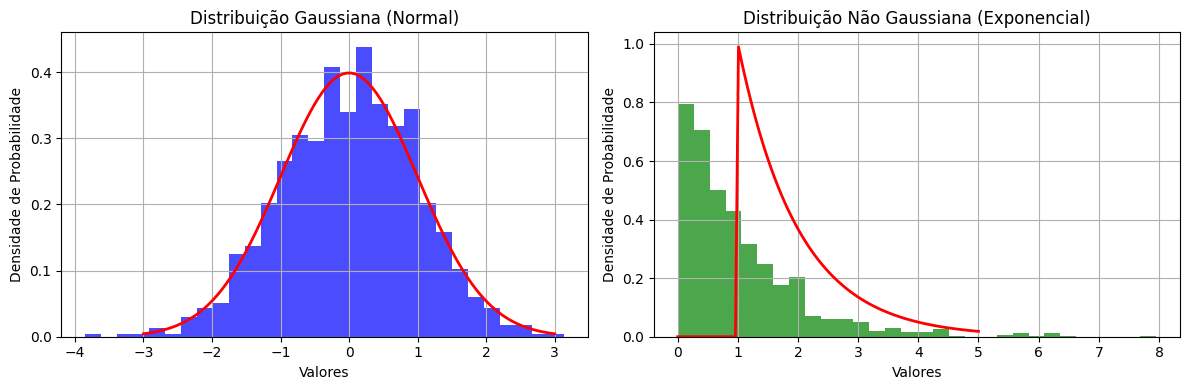

In [6]:
from scipy.stats import norm, expon

# Dados para a distribuição gaussiana (normal)
mu = 0  # Média
sigma = 1  # Desvio padrão
gaussian_data = np.random.normal(mu, sigma, 1000)

# Dados para a distribuição não gaussiana (exponencial)
scale = 1  # Parâmetro de escala
exponential_data = np.random.exponential(scale, 1000)

# Criação dos gráficos
plt.figure(figsize=(12, 4))

# Gráfico da distribuição gaussiana
plt.subplot(1, 2, 1)
plt.hist(gaussian_data, bins=30, density=True, color='blue', alpha=0.7)
plt.title('Distribuição Gaussiana (Normal)')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=2)
plt.grid(True)

# Gráfico da distribuição não gaussiana (exponencial)
plt.subplot(1, 2, 2)
plt.hist(exponential_data, bins=30, density=True, color='green', alpha=0.7)
plt.title('Distribuição Não Gaussiana (Exponencial)')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
x = np.linspace(0, 5, 100)
plt.plot(x, expon.pdf(x, scale), 'r-', lw=2)
plt.grid(True)

plt.tight_layout()
plt.show()


In [7]:
# Padronizar os atributos (features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Por que não normalizar a variável alvo (y) em uma regressão com KNN?

1. **Natureza da Variável Alvo**:
   - A variável alvo (y) em um problema de regressão geralmente representa o valor que você está tentando prever, como preços, pontuações, ou qualquer outra medida numérica contínua.
   - A escala da variável alvo é uma parte intrínseca do problema e representa diretamente a grandeza que você deseja estimar.

2. **Métricas de Distância em Atributos (X)**:
   - No KNN para regressão, as métricas de distância são calculadas com base nos atributos (X), não na variável alvo (y).
   - A normalização de y não afeta o cálculo das distâncias entre pontos de dados com diferentes valores de y.

3. **Independência de Escala**:
   - O KNN é um algoritmo que é independente da escala dos valores da variável alvo.
   - A normalização de y não afeta a similaridade ou a distância entre pontos de dados, que é o aspecto crítico do KNN.

4. **Interpretação Direta**:
   - A normalização de y pode dificultar a interpretação direta dos resultados do modelo.
   - Manter a variável alvo em sua escala original facilita a compreensão dos resultados, pois eles têm significado direto.

5. **Diferentes Alvos, Diferentes Escalas**:
   - Em problemas de regressão, diferentes conjuntos de dados podem ter variáveis alvo com escalas muito diferentes.
   - Normalizar y em um problema pode não ser apropriado em outro, tornando a normalização da variável alvo inconsistente.

6. **Concentração nas Features (X)**:
   - A normalização geralmente se concentra em padronizar os atributos (X) para garantir que as métricas de distância considerem todos os atributos igualmente.
   - O foco está na consistência das escalas dos atributos, não na variável alvo.

In [8]:
# Inicializar o modelo KNN para regressão
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [9]:
# Treinar o modelo com o conjunto de treinamento
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [10]:
# Fazer previsões no conjunto de validação
y_val_pred = knn_regressor.predict(X_val)

In [11]:
# Avaliar o desempenho do modelo
mse = mean_squared_error(y_val, y_val_pred)
print(f"Erro Quadrático Médio (MSE) na validação: {mse}")

Erro Quadrático Médio (MSE) na validação: 8093381.88458


### Por que Selecionar o Número Ideal de Vizinhos (k) em uma Regressão com KNN?

1. **Impacto no Desempenho**:
   - A escolha do número de vizinhos (k) no algoritmo KNN tem um impacto significativo no desempenho do modelo de regressão.
   - Um valor inadequado de k pode levar a um modelo subajustado (underfitting) ou superajustado (overfitting).

2. **Balanceamento entre Viés e Variância**:
   - O número de vizinhos (k) influencia o equilíbrio entre viés e variância do modelo.
   - Um valor pequeno de k (por exemplo, k = 1) resulta em um modelo de alta variância (susceptível a overfitting), pois é sensível a ruído nos dados.
   - Um valor grande de k (por exemplo, k = N, onde N é o tamanho do conjunto de dados) resulta em um modelo de alto viés (susceptível a underfitting), pois simplifica demais as previsões.

3. **Busca pela Generalização Ideal**:
   - O objetivo é encontrar o valor de k que permite que o modelo generalize bem para dados não vistos, fazendo previsões precisas.
   - A seleção cuidadosa de k ajuda a evitar a subestimação ou superestimação dos relacionamentos nos dados.

4. **Validação Cruzada como Ferramenta**:
   - A seleção de hiperparâmetros, como k, é geralmente realizada usando técnicas de validação cruzada, como a validação cruzada k-fold.
   - A validação cruzada ajuda a avaliar o desempenho do modelo com diferentes valores de k e escolher o valor que minimiza o erro de previsão.

5. **Evitar Overfitting e Underfitting**:
   - Selecionar o número ideal de vizinhos ajuda a evitar problemas de overfitting (quando o modelo é muito complexo) e underfitting (quando o modelo é muito simples).
   - Um valor apropriado de k permite que o modelo encontre um equilíbrio entre flexibilidade e estabilidade.

6. **Impacto nas Previsões**:
   - A escolha do valor de k também afeta diretamente as previsões do modelo. Valores diferentes de k podem resultar em previsões substancialmente diferentes.



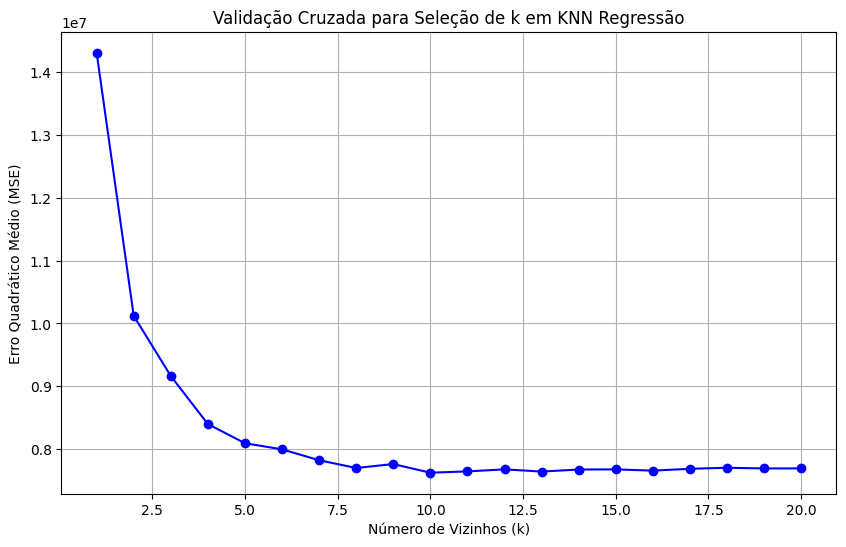

O valor ideal de k é 10 com MSE mínimo de 7623714.6021


In [12]:
# Escolha uma faixa de valores de k que você deseja testar
k_values = range(1, 21)

# Inicialize uma lista para armazenar os valores de MSE para cada valor de k
mse_values = []

# Realize a validação cruzada para cada valor de k

for k in k_values:
    # Crie um modelo KNN Regressor com o valor atual de k
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Treine o modelo com os dados de treinamento
    knn_regressor.fit(X_train, y_train)
    
    # Faça previsões no conjunto de teste
    y_pred = knn_regressor.predict(X_val)
    
    # Calcule o Erro Quadrático Médio (MSE)
    mse = mean_squared_error(y_val, y_pred)
    
    # Armazene o valor de MSE na lista
    mse_values.append(mse)

# Plote a curva do MSE em relação ao número de vizinhos (k)
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Validação Cruzada para Seleção de k em KNN Regressão')
plt.grid(True)
plt.show()

# Encontre o valor de k que minimiza o MSE
best_k = k_values[np.argmin(mse_values)]
print(f"O valor ideal de k é {best_k} com MSE mínimo de {min(mse_values)}")


In [13]:
# Inicializar o modelo KNN para regressão
knn_regressor = KNeighborsRegressor(n_neighbors=10)

# Treinar o modelo com o conjunto de treinamento
knn_regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_val_pred = knn_regressor.predict(X_val)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_val, y_val_pred)
print(f"Erro Quadrático Médio (MSE) na validação: {mse}")

Erro Quadrático Médio (MSE) na validação: 7623714.6021


In [14]:
# Fazer previsões no conjunto de teste
y_test_pred = knn_regressor.predict(X_test)

In [15]:
# Avaliar o desempenho no conjunto de teste
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Erro Quadrático Médio (MSE) no teste: {mse_test}")

Erro Quadrático Médio (MSE) no teste: 7954698.127385


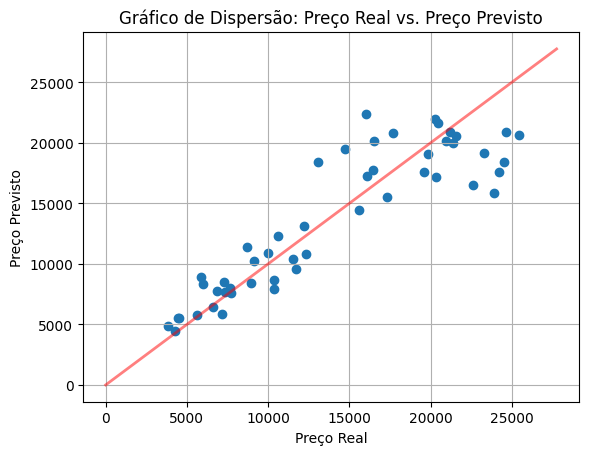

In [16]:
# Plotar os resultados, se desejado
plt.scatter(y_test[500:550], y_test_pred[500:550])
eixo_x = np.linspace(0, y_test.max()[0], 100)
eixo_y = eixo_x
plt.plot(eixo_x, eixo_y, color='#f00', linewidth=2, alpha=.5)
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Gráfico de Dispersão: Preço Real vs. Preço Previsto')
plt.grid()
plt.show()

del(eixo_x, eixo_y)

In [17]:
y_test_pred[:5]

array([[21009.5],
       [18202.5],
       [19417. ],
       [13414.1],
       [15253.4]])

In [18]:
y_test[:5]

,valor
7072,19078
6204,20311
7110,16788
220,10935
69,13311


## Classificação

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [20]:
df = pd.read_csv('notebooks_classificacao.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marca              10000 non-null  object
 1   ano                10000 non-null  int64 
 2   qtd_nucleos        10000 non-null  int64 
 3   qtd_threads        10000 non-null  int64 
 4   ram                10000 non-null  int64 
 5   gpu_dedicada       10000 non-null  object
 6   ram_gpu            10000 non-null  int64 
 7   entradas_usb       10000 non-null  int64 
 8   duracao_bateria    10000 non-null  int64 
 9   resolucao_tela     10000 non-null  object
 10  tipo_tela          10000 non-null  object
 11  tela_touch         10000 non-null  object
 12  armazenamento_hdd  10000 non-null  int64 
 13  armazenamento_ssd  10000 non-null  int64 
 14  segmento           10000 non-null  object
dtypes: int64(9), object(6)
memory usage: 1.1+ MB


In [22]:
# Convertendo colunas textuais para numéricas usando One-Hot Encoding
for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    # Ajuste e transforme a coluna categórica
    df[column] = label_encoder.fit_transform(df[column])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   marca              10000 non-null  int32
 1   ano                10000 non-null  int64
 2   qtd_nucleos        10000 non-null  int64
 3   qtd_threads        10000 non-null  int64
 4   ram                10000 non-null  int64
 5   gpu_dedicada       10000 non-null  int32
 6   ram_gpu            10000 non-null  int64
 7   entradas_usb       10000 non-null  int64
 8   duracao_bateria    10000 non-null  int64
 9   resolucao_tela     10000 non-null  int32
 10  tipo_tela          10000 non-null  int32
 11  tela_touch         10000 non-null  int32
 12  armazenamento_hdd  10000 non-null  int64
 13  armazenamento_ssd  10000 non-null  int64
 14  segmento           10000 non-null  int32
dtypes: int32(6), int64(9)
memory usage: 937.6 KB


In [24]:
X = df.drop(columns='segmento').values
y = df[['segmento']]

In [25]:
# Separar os dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Padronizar os atributos (features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [26]:
# Inicializar o classificador KNN com um valor específico de k (número de vizinhos)
k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [27]:
# Treinar o classificador com os dados de treinamento
knn_classifier.fit(X_train, y_train)

C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [28]:
# Fazer previsões nos dados de teste
y_pred = knn_classifier.predict(X_test)

In [29]:
# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.85


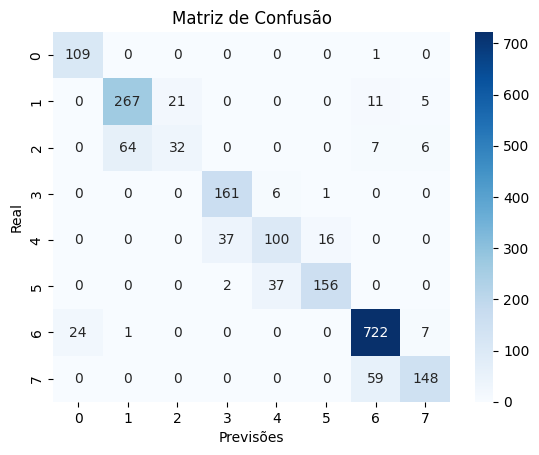

In [30]:
# calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# plotar o heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.show()

In [31]:
def elbow_method(X_train, y_train, X_val, y_val, max_k=10):
    # Inicializa uma lista para armazenar os valores de Erro Quadrático Médio (MSE) para diferentes valores de k
    accuracy_values = []
    
    # Itera através dos valores de k de 1 a max_k
    for k in range(1, max_k + 1):
        # Cria um modelo KNN Regressor com o valor atual de k
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        
        # Treina o modelo com os dados de treinamento
        knn_classifier.fit(X_train, y_train)
        
        # Fazer previsões nos dados de teste
        y_pred = knn_classifier.predict(X_val)

        # Calcula a acurácia entre as previsões e os valores reais
        accuracy = accuracy_score(y_val, y_pred)
        
        # Armazena o valor MSE na lista de valores
        accuracy_values.append(accuracy)
    
    # Plota a curva do cotovelo
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), accuracy_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Número de Vizinhos (k)')
    plt.ylabel('Acurácia')
    plt.title('Método do Cotovelo para KNN Classificação')
    plt.grid(True)
    plt.show()


### Método do Cotovelo (Elbow Method) em Aprendizado de Máquina

O Método do Cotovelo é uma técnica utilizada para determinar o número ideal de clusters ou vizinhos em algoritmos de aprendizado de máquina, como K-Means ou KNN, respectivamente. Este método ajuda a encontrar um valor apropriado para hiperparâmetros, como 'k', de forma empírica.

1. **Definição do Problema**:
   - O Método do Cotovelo é útil quando você precisa determinar um valor apropriado para um hiperparâmetro, como o número de clusters (no caso do K-Means) ou o número de vizinhos (no caso do KNN).

2. **Variando o Hiperparâmetro**:
   - O primeiro passo é variar o valor do hiperparâmetro em questão. Por exemplo, você pode testar valores de 'k' de 1 a um número máximo definido.

3. **Treinamento do Modelo**:
   - Para cada valor do hiperparâmetro, você treina o modelo correspondente (por exemplo, K-Means ou KNN) com o conjunto de dados de treinamento.

4. **Avaliação da Qualidade**:
   - Em seguida, você avalia a qualidade do modelo para cada valor do hiperparâmetro usando uma métrica apropriada. Por exemplo, em K-Means, uma métrica comum é a soma dos erros quadráticos (SSE), enquanto no KNN para regressão, o Erro Quadrático Médio (MSE) pode ser usado.

5. **Plotagem dos Resultados**:
   - Você registra as métricas de avaliação para cada valor do hiperparâmetro e, em seguida, cria um gráfico que mostra a variação das métricas à medida que o hiperparâmetro muda.

6. **Identificando o Cotovelo**:
   - Ao analisar o gráfico, você procura um ponto de inflexão, que se assemelha a um cotovelo. Este ponto é onde a métrica começa a se estabilizar, e escolher um valor maior para o hiperparâmetro não melhora significativamente o desempenho do modelo.

7. **Seleção do Valor Ideal**:
   - O valor do hiperparâmetro correspondente ao ponto de cotovelo é considerado o valor ideal para o problema em questão. Por exemplo, o número de clusters ou vizinhos que maximizam o desempenho do modelo.

8. **Aplicação Prática**:
   - O Método do Cotovelo é amplamente utilizado em tarefas de clustering, seleção de hiperparâmetros e ajuste fino de modelos de aprendizado de máquina para obter um equilíbrio entre subajuste e superajuste.

Este método fornece uma abordagem visual e empírica para a seleção de hiperparâmetros, ajudando a escolher valores que resultem em modelos mais eficazes para um determinado problema.

C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversi

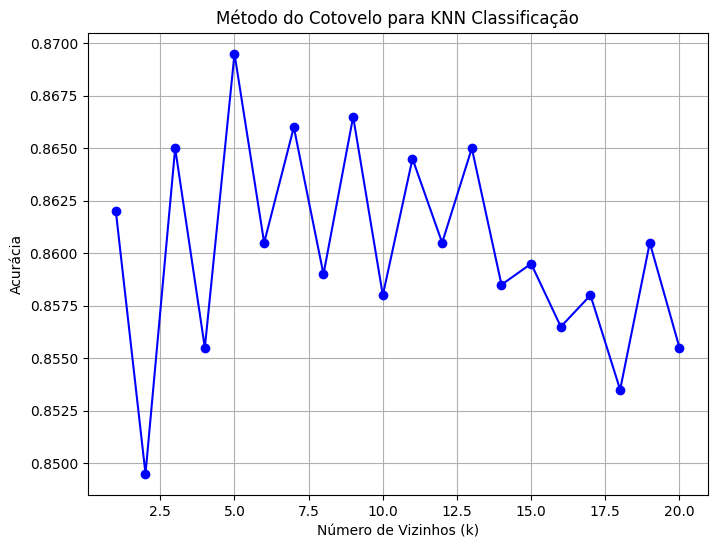

In [32]:
elbow_method(X_train, y_train, X_val, y_val, max_k=20)

C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Acurácia do modelo: 0.85


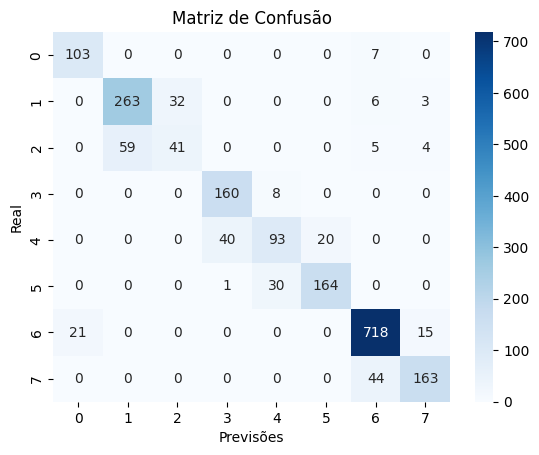

In [33]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)


# Treinar o classificador com os dados de treinamento
knn_classifier.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = knn_classifier.predict(X_test)


# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')


# calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# plotar o heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.show()


# Métricas de Distância

# Distâncias para o Algoritmo K-Nearest Neighbors (KNN)

O algoritmo K-Nearest Neighbors (KNN) é um método de aprendizado de máquina supervisionado que classifica pontos de dados com base na proximidade com os vizinhos mais próximos. Para calcular essa proximidade, diferentes métricas de distância podem ser usadas. Vamos explorar três delas: a distância Euclidiana, a distância Manhattan e a distância Minkowski.

## Distância Euclidiana (Verde)

- A distância Euclidiana é a métrica de distância mais comum.
- Ela é calculada como a raiz quadrada da soma dos quadrados das diferenças entre as coordenadas de dois pontos.
- Fórmula: $d_{euclidiana}(x, y) = sqrt(Σ(xi - yi)^2)$
- Sensível a valores discrepantes.
- Apropriada para dados distribuídos de forma contínua.

## Distância Manhattan (Azul)

- A distância Manhattan, também chamada de distância da cidade, é outra métrica comum.
- É calculada como a soma das diferenças absolutas entre as coordenadas de dois pontos.
- Fórmula: $d_{manhattan}(x, y) = Σ|xi - yi|$
- Menos sensível a valores discrepantes do que a distância Euclidiana.
- Útil quando os dados têm uma estrutura de grade ou características com unidades diferentes.

## Distância Minkowski (Amarela p = 2)  (Vermelha p = 1)

- A distância Minkowski é uma métrica mais geral que engloba as distâncias Euclidiana e Manhattan.
- É definida pela fórmula: $d_{minkowski}(x, y, p) = (Σ|xi - yi|^p)^(1/p)$
- O parâmetro $p$ determina o tipo de distância.
- Quando $p$ é igual a 2, é equivalente à distância Euclidiana.
- Quando $p$ é igual a 1, é equivalente à distância Manhattan.
- Permite ajustar a sensibilidade a discrepâncias nos dados.

Essas são as três principais métricas de distância usadas no algoritmo KNN para calcular a proximidade entre pontos de dados. A escolha da métrica apropriada depende da natureza dos dados e dos requisitos do problema.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/283px-Manhattan_distance.svg.png)

In [34]:
def comparar_metricas(knn):
     # Gerar dados sintéticos com quatro classes mais próximas umas das outras
    X, y = make_blobs(n_samples=40, centers=4, cluster_std=3.0, random_state=42)

    # Treinar o modelo com todos os dados
    knn.fit(X, y)

    # Criar uma grade de pontos para a fronteira de decisão
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotar os dados e a fronteira de decisão
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', marker='o')
    plt.title('Fronteira de Decisão do kNN (k=3)')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')

    plt.show()


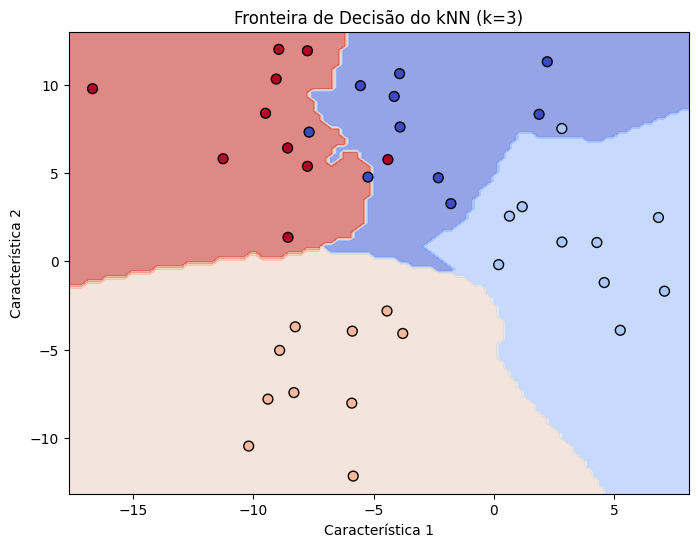

In [35]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
comparar_metricas(knn)

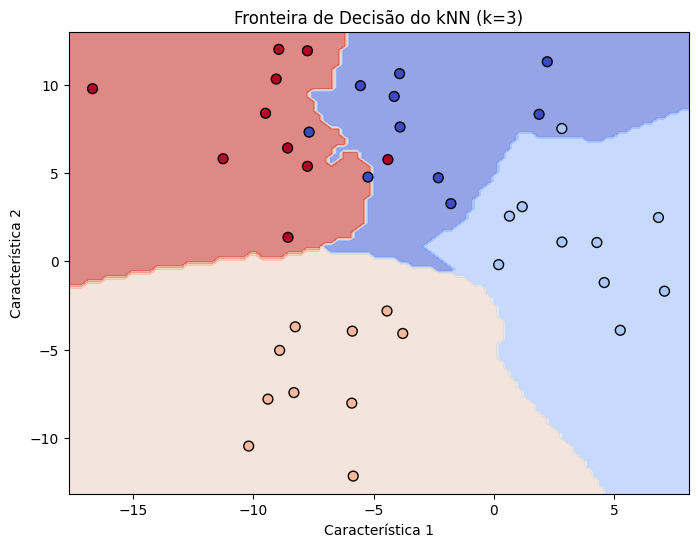

In [36]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p = 2)
comparar_metricas(knn)

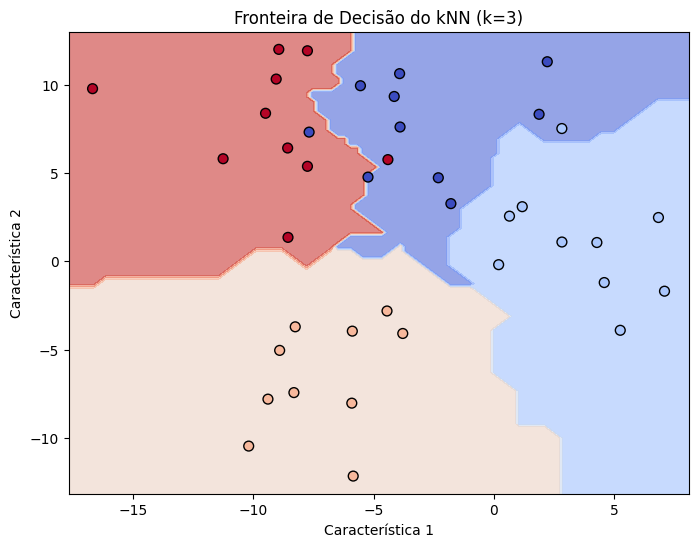

In [37]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
comparar_metricas(knn)

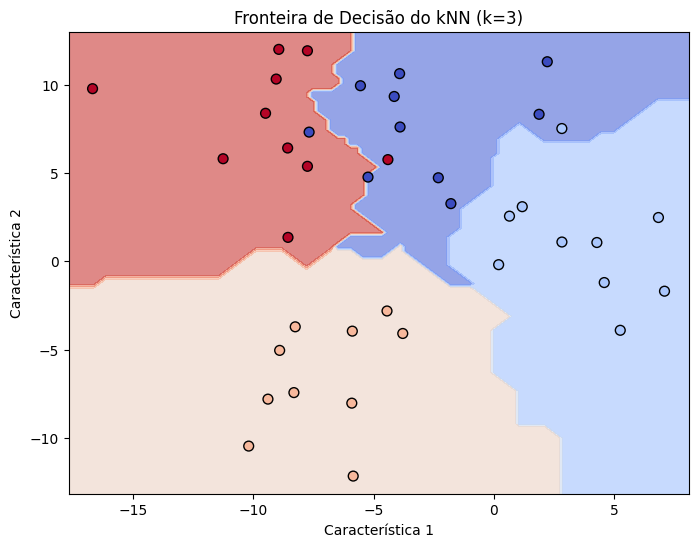

In [38]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p = 1)
comparar_metricas(knn)

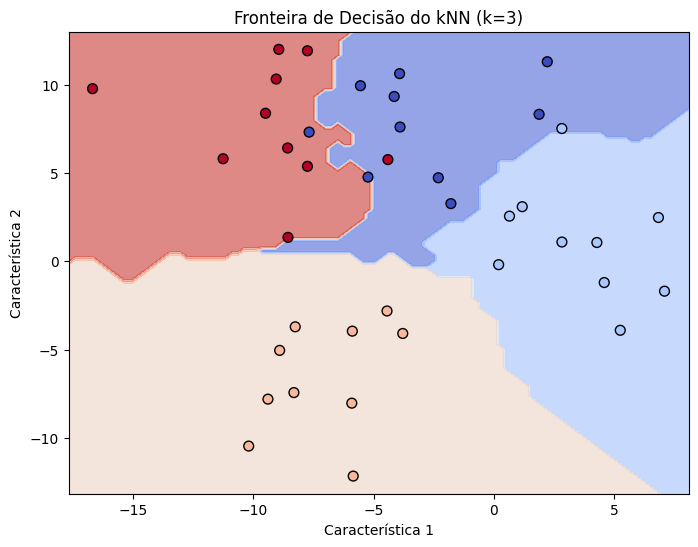

In [39]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p = 15)
comparar_metricas(knn)

In [40]:
df = pd.read_csv('notebooks_classificacao.csv')

# Convertendo colunas textuais para numéricas usando One-Hot Encoding
for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    # Ajuste e transforme a coluna categórica
    df[column] = label_encoder.fit_transform(df[column])

X = df.drop(columns='segmento').values
y = df[['segmento']]


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Padronizar os atributos (features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Inicializar o classificador KNN com um valor específico de k (número de vizinhos)
k = 5

knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

knn_minkowski = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 5)
knn_minkowski.fit(X_train, y_train)
y_pred_minkowski = knn_minkowski.predict(X_test)
accuracy_minkowski = accuracy_score(y_test, y_pred_minkowski)

C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [41]:
print(f'Acurária euclidean: {accuracy_euclidean}')
print(f'Acurária manhattan: {accuracy_manhattan}')
print(f'Acurária minkowski: {accuracy_minkowski}')

Acurária euclidean: 0.8525
Acurária manhattan: 0.8815
Acurária minkowski: 0.816


In [42]:
def qual_melhor_p(X_train, y_train, X_val, y_val, max_p=10):
    # Inicializa uma lista para armazenar os valores de Erro Quadrático Médio (MSE) para diferentes valores de k
    accuracy_values = []
    
    # Itera através dos valores de k de 1 a max_k
    for p in range(1, max_p + 1):
        # Cria um modelo KNN Regressor com o valor atual de k
        knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = p)
        
        # Treina o modelo com os dados de treinamento
        knn_classifier.fit(X_train, y_train)
        
        # Fazer previsões nos dados de teste
        y_pred = knn_classifier.predict(X_val)

        # Calcula a acurácia entre as previsões e os valores reais
        accuracy = accuracy_score(y_val, y_pred)
        
        # Armazena o valor MSE na lista de valores
        accuracy_values.append(accuracy)
    
    # Plota a curva do cotovelo
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_p + 1), accuracy_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Número de p')
    plt.ylabel('Acurácia')
    plt.title('Verificando qual o melhor número de P')
    plt.grid(True)
    plt.show()

C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\gabriel.assis\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: DataConversi

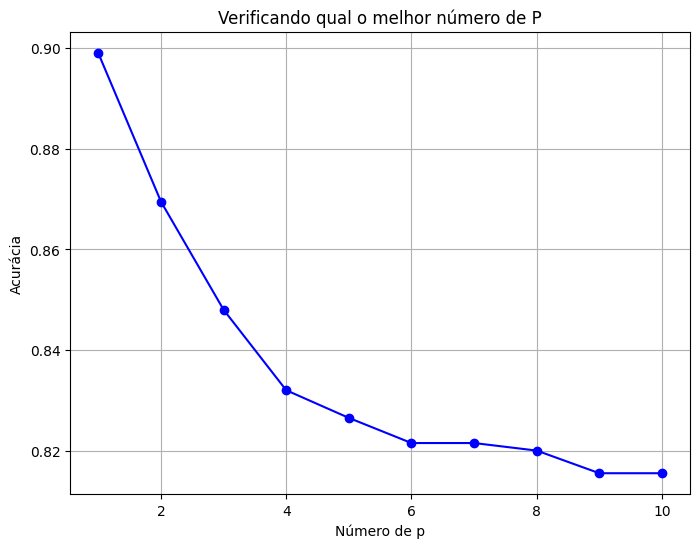

In [43]:
qual_melhor_p(X_train, y_train, X_val, y_val, max_p=10)

# Exercício


### Enunciado:

Estamos lidando com um problema de classificação binária. Sua tarefa é construir um modelo que possa determinar se um registro específico pertence a uma das duas classes: se um indivíduo tem câncer de pele ou não. A base de dados possui um total de 10.000 registros, sendo que 5.000 destes são de indivíduos com câncer de pele e os outros 5.000 são de indivíduos sem câncer de pele. A classe alvo é denominada "SkinCancer".

Siga as etapas abaixo para preparar seus dados e construir o modelo:

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

## Exercício 1:
Leia a base de dados nomeada cancer_pele.csv.

In [2]:
df = pd.read_csv('cancer_pele.csv')
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,25.61,Yes,No,No,0.0,4.0,No,Female,70-74,White,No,No,Very good,5.0,No,No,Yes
1,No,23.67,No,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Very good,8.0,No,No,Yes
2,No,30.04,Yes,No,No,0.0,15.0,No,Female,45-49,White,No,No,Very good,7.0,Yes,No,Yes


## Exercício 2:
Realize o tratamento dos valores textuais, convertendo-os para formatos numéricos, para que possam ser utilizados em algoritmos de aprendizado de máquina.

In [3]:
colunas_yes_no = []

for i in range(df.shape[1]):
    if 'No' in df.iloc[:,i].unique() and len(df.iloc[:,i].unique()) == 2:
        colunas_yes_no.append(df.dtypes.index[i])

print(colunas_yes_no)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']


C:\Users\gabriel.assis\AppData\Local\Temp\ipykernel_11236\3481402784.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'No' in df.iloc[:,i].unique() and len(df.iloc[:,i].unique()) == 2:
C:\Users\gabriel.assis\AppData\Local\Temp\ipykernel_11236\3481402784.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'No' in df.iloc[:,i].unique() and len(df.iloc[:,i].unique()) == 2:
C:\Users\gabriel.assis\AppData\Local\Temp\ipykernel_11236\3481402784.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'No' in df.iloc[:,i].unique() and len(df.iloc[:,i].unique()) == 2:


In [4]:
for i in colunas_yes_no:
    df.loc[df[i] == 'No', i] = 0
    df.loc[df[i] == 'Yes', i] = 1
    df[i] = df[i].astype(int)

In [5]:
colunas_texto = []

for i in range(df.shape[1]):
    if df.dtypes[i] == 'object':
        colunas_texto.append(df.dtypes.index[i])

print(colunas_texto)

['Sex', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth']


In [6]:
for i in colunas_texto:
    print(f'{i}\n{df[i].unique()}\n')

Sex
['Female' 'Male']

AgeCategory
['70-74' '60-64' '45-49' '65-69' '80 or older' '75-79' '50-54' '55-59'
 '35-39' '30-34' '40-44' '18-24' '25-29']

Race
['White' 'Hispanic' 'American Indian/Alaskan Native' 'Other' 'Asian'
 'Black']

Diabetic
['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']

GenHealth
['Very good' 'Excellent' 'Good' 'Fair' 'Poor']



In [7]:
df.loc[df['AgeCategory'] == '18-24', 'AgeCategory'] = 1
df.loc[df['AgeCategory'] == '25-29', 'AgeCategory'] = 2
df.loc[df['AgeCategory'] == '30-34', 'AgeCategory'] = 3
df.loc[df['AgeCategory'] == '35-39', 'AgeCategory'] = 4
df.loc[df['AgeCategory'] == '40-44', 'AgeCategory'] = 5
df.loc[df['AgeCategory'] == '45-49', 'AgeCategory'] = 6
df.loc[df['AgeCategory'] == '50-54', 'AgeCategory'] = 7
df.loc[df['AgeCategory'] == '55-59', 'AgeCategory'] = 8
df.loc[df['AgeCategory'] == '60-64', 'AgeCategory'] = 9
df.loc[df['AgeCategory'] == '65-69', 'AgeCategory'] = 10
df.loc[df['AgeCategory'] == '70-74', 'AgeCategory'] = 11
df.loc[df['AgeCategory'] == '75-79', 'AgeCategory'] = 12
df.loc[df['AgeCategory'] == '80 or older', 'AgeCategory'] = 13
df['AgeCategory'] = df['AgeCategory'].astype(int)

df.loc[df['GenHealth'] == 'Poor', 'GenHealth'] = 1
df.loc[df['GenHealth'] == 'Fair', 'GenHealth'] = 2
df.loc[df['GenHealth'] == 'Good', 'GenHealth'] = 3
df.loc[df['GenHealth'] == 'Very good', 'GenHealth'] = 4
df.loc[df['GenHealth'] == 'Excellent', 'GenHealth'] = 5
df['GenHealth'] = df['GenHealth'].astype(int)

df.loc[df['Diabetic'] == 'No', 'Diabetic'] = 0
df.loc[df['Diabetic'] == 'Yes (during pregnancy)', 'Diabetic'] = 1
df.loc[df['Diabetic'] == 'No, borderline diabetes', 'Diabetic'] = 2
df.loc[df['Diabetic'] == 'Yes', 'Diabetic'] = 3
df['Diabetic'] = df['Diabetic'].astype(int)

In [8]:
df.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                  object
AgeCategory           int32
Race                 object
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

In [9]:
df.select_dtypes(include='O').columns

Index(['Sex', 'Race'], dtype='object')

In [10]:
le = LabelEncoder()

for i in df.describe(include='O'):
    df[i] = le.fit_transform(df[i])

In [11]:
df.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

## Exercício 3:
Separe os dados em dois conjuntos: X, que representará as características ou atributos dos registros; e y, que representará a classe alvo "SkinCancer".

In [12]:
X = df.drop('SkinCancer', axis = 1)
y = df['SkinCancer']

## Exercício 4:
Divida os conjuntos X e y em dados de treinamento e teste. 80% dos dados devem ser usados para treinamento e os restantes 20% para teste.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=20)

## Exercício 5:
Normalize os conjuntos X de treinamento e teste para garantir que todos os atributos estejam na mesma escala, o que pode ajudar na convergência e no desempenho dos algoritmos de aprendizado de máquina.

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Exercício 6:
Utilize o método do cotovelo para determinar a quantidade ideal do valor de k para um algoritmo de agrupamento ou classificação.

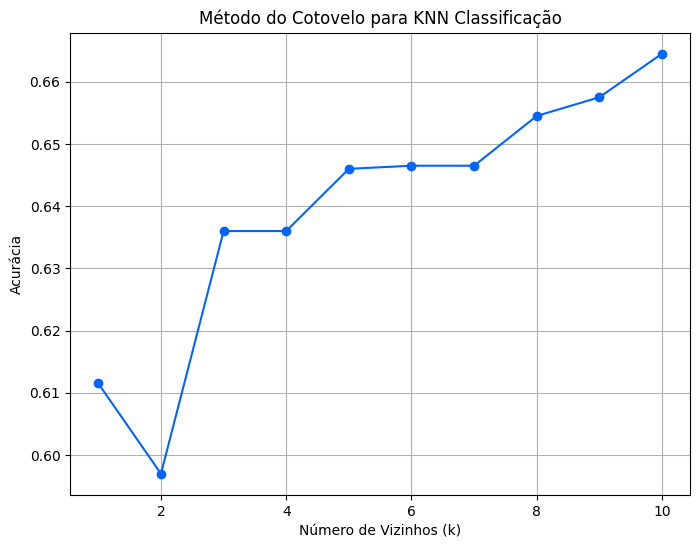

In [15]:
k_values = range(1, 11)

accuracy_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracy_values.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='#0065ff')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Método do Cotovelo para KNN Classificação')
plt.grid(True)
plt.show()

In [16]:
k = 10

## Exercício 7:
Após definir o valor ideal de k, realize testes para determinar qual métrica de distância oferece os melhores resultados para seu modelo: euclidiana ou manhattan. Compare o desempenho entre elas.

In [17]:
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia distância euclidiana: {accuracy}')

Acurácia distância euclidiana: 0.6645


In [18]:
knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia distância Manhattan: {accuracy}')

Acurácia distância Manhattan: 0.6635
